In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import csv
from tabulate import tabulate
import pandas as pd
%matplotlib inline


# 50 Retrofits Comparison

In [62]:
retstrats = ['none','all','old','traf','clust']
tt = {}
vmt = {}
bout ={ }
for strat in retstrats:
    tt[strat] = []
    vmt[strat] = []
    bout[strat] = []
    
# import results

# no retrofits
with open('GB_outputs/traffic_outputs_norets_125.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        tt['none'].append(100*(float(row[3])-float(row[2]))/float(row[2])) # % change in travel time relative to undamaged network
        vmt['none'].append(100*(float(row[5])-float(row[4]))/float(row[4])) # % change in vehicle miles traveled relative to undamaged network
        bout['none'].append(int(row[6]))
# all bridges retrofitted
with open('traffic_output_rets_all.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        tt['all'].append(100*(float(row[3])-float(row[2]))/float(row[2])) # % change in travel time relative to undamaged network
        vmt['all'].append(100*(float(row[5])-float(row[4]))/float(row[4])) # % change in vehicle miles traveled relative to undamaged network
        bout['all'].append(int(row[6]))
# age-based retrofits
with open('GB_output_50rets/traffic_outputs_50rets_old.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        tt['old'].append(100*(float(row[3])-float(row[2]))/float(row[2]))
        vmt['old'].append(100*(float(row[5])-float(row[4]))/float(row[4]))
        bout['old'].append(int(row[6]))
# traffic-based retrofits
with open('GB_output_50rets/traffic_outputs_50rets_traf.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        tt['traf'].append(100*(float(row[3])-float(row[2]))/float(row[2]))
        vmt['traf'].append(100*(float(row[5])-float(row[4]))/float(row[4]))
        bout['traf'].append(int(row[6]))

# local-clustering-coefficient-based retrofits (PARTIAL)
with open('GB_output_50rets/traffic_output_50rets_clust_partial.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        tt['clust'].append(100*(float(row[3])-float(row[2]))/float(row[2]))
        vmt['clust'].append(100*(float(row[5])-float(row[4]))/float(row[4]))
        bout['clust'].append(int(row[6]))
        
statistics = []
headers = ['time_median', 'time_mean', 'time_stdev','vmt_median', 'vmt_mean', 'vmt_stdev']#, 'bout_median', 'bout_mean', 'bout_stdev']

for strat in retstrats:
    strat_stats = [strat]
    strat_stats.append(np.median(tt[strat]))
    strat_stats.append(np.mean(tt[strat]))
    strat_stats.append(np.std(tt[strat]))
    strat_stats.append(np.median(vmt[strat]))
    strat_stats.append(np.mean(vmt[strat]))
    strat_stats.append(np.std(vmt[strat]))
#     strat_stats.append(np.median(bout[strat]))
#     strat_stats.append(np.mean(bout[strat]))
#     strat_stats.append(np.std(bout[strat]))
    statistics.append(strat_stats)

In [63]:
print(tabulate(statistics,headers))

         time_median    time_mean    time_stdev    vmt_median    vmt_mean    vmt_stdev
-----  -------------  -----------  ------------  ------------  ----------  -----------
none        14.0594       49.8107       158.089       17.944      19.4001     10.9765
all          1.26465      35.7347       113.844       14.8071     16.2754      9.58531
old         20.1415       61.791        144.896       17.407      19.6468     11.2108
traf         7.73259      54.8512       156.812       17.6925     19.4073     11.5994
clust       16.2073       56.0521       133.835       17.9482     18.8961     10.3029


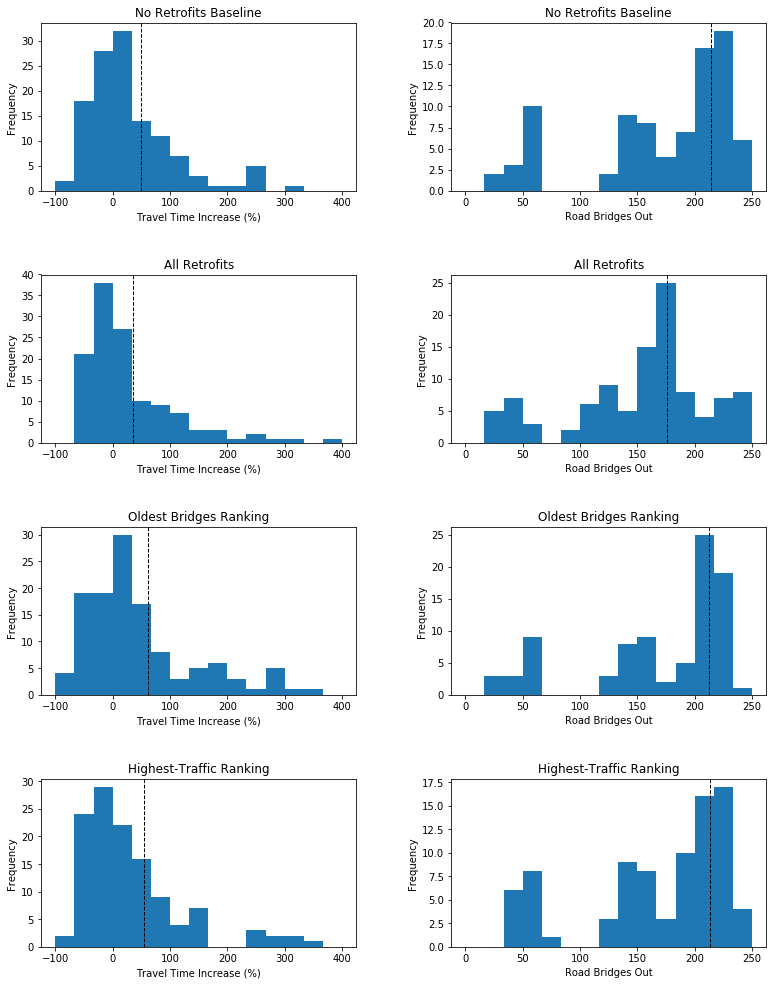

In [16]:
full_titles = {'none': 'No Retrofits Baseline',
               'all': 'All Retrofits',
               'old': 'Oldest Bridges Ranking',
               'traf': 'Highest-Traffic Ranking'}

count = 1
plt.figure(figsize=(13,17))
for strat in retstrats:
    plt.subplot(len(retstrats), 2, count)
    plt.hist(tt[strat], range=(-100, 400), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Travel Time Increase (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(tt[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(retstrats), 2, count+1)
    plt.hist(bout[strat], range=(0,250), bins = 15)
    plt.title(full_titles[strat])
    plt.xlabel('Road Bridges Out')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(bout[strat]), color='k', linestyle='dashed', linewidth=1)
    
#     plt.subplot(len(retstrats), 2, count+1)
#     plt.hist(vmt[strat], range=(-10, 60), bins=15)
#     plt.title(full_titles[strat])
#     plt.xlabel('VMT Increase (%)')
#     plt.ylabel('Frequency')
#     plt.axvline(np.mean(vmt[strat]), color='k', linestyle='dashed', linewidth=1)
    
    count += 2
    
plt.subplots_adjust(hspace=.5, wspace=0.3)
plt.show()

# Spot-checking retrofits

In [20]:
import pickle

with open('input/20140114_master_bridge_dict.pkl','rb') as f:
    master_dict = pickle.load(f)
with open('input/master_bridge_dict_ret_all.pkl', 'rb') as f:
    master_dict_allrets = pickle.load(f)  # has 1743 keys. One per highway bridge. (NOT BART)
with open('input/master_bridge_dict_ret_old_2.pkl','rb') as f:
    master_dict_50rets_old = pickle.load(f)
    
# GB: create inverse dictionary to map new IDs to original IDs
new_to_oldIDs = {}
for k, v in master_dict.items():
    for v2 in v.keys():
        if v2 == 'new_id':
            n = master_dict[k][v2]
            new_to_oldIDs[str(n)] = k  # key = newID, value = originalID

In [38]:
og_mod = master_dict[new_to_oldIDs['1417']]['mod_lnSa']
all_mod = master_dict_allrets[new_to_oldIDs['1417']]['mod_lnSa']
old_mod = master_dict_50rets_old[new_to_oldIDs['1417']]['mod_lnSa']
og_ext = master_dict[new_to_oldIDs['1417']]['ext_lnSa']
all_ext = master_dict_allrets[new_to_oldIDs['1417']]['ext_lnSa']
old_ext = master_dict_50rets_old[new_to_oldIDs['1417']]['ext_lnSa']
og_com = master_dict[new_to_oldIDs['1417']]['com_lnSa']
all_com = master_dict_allrets[new_to_oldIDs['1417']]['com_lnSa']
old_com = master_dict_50rets_old[new_to_oldIDs['1417']]['com_lnSa']
print('bridge new_ID 1417')
print('original moderate lnSa is ' + str(og_mod))
print('retrofitted moderate lnSa in all retrofit set is ' + str(all_mod))
print('retrofitted moderate lnSa in oldest retrofit set is ' + str(old_mod))
print('original extensive lnSa is ' + str(og_ext))
print('retrofitted extensive lnSa in all retrofit set is ' + str(all_ext))
print('retrofitted extensive lnSa in oldest retrofit set is ' + str(old_ext))
print('original complete lnSa is ' + str(og_com))
print('retrofitted complete lnSa in all retrofit set is ' + str(all_com))
print('retrofitted complete lnSa in oldest retrofit set is ' + str(old_com))

bridge new_ID 1417
original moderate lnSa is 0.54
retrofitted moderate lnSa in all retrofit set is 0.621
retrofitted moderate lnSa in oldest retrofit set is 0.621
original extensive lnSa is 0.66
retrofitted extensive lnSa in all retrofit set is 0.759
retrofitted extensive lnSa in oldest retrofit set is 0.759
original complete lnSa is 0.95
retrofitted complete lnSa in all retrofit set is 1.0924999999999998
retrofitted complete lnSa in oldest retrofit set is 1.0924999999999998


In [39]:
tempid = '1626'
og_mod = master_dict[new_to_oldIDs[tempid]]['mod_lnSa']
all_mod = master_dict_allrets[new_to_oldIDs[tempid]]['mod_lnSa']
old_mod = master_dict_50rets_old[new_to_oldIDs[tempid]]['mod_lnSa']
og_ext = master_dict[new_to_oldIDs[tempid]]['ext_lnSa']
all_ext = master_dict_allrets[new_to_oldIDs[tempid]]['ext_lnSa']
old_ext = master_dict_50rets_old[new_to_oldIDs[tempid]]['ext_lnSa']
og_com = master_dict[new_to_oldIDs[tempid]]['com_lnSa']
all_com = master_dict_allrets[new_to_oldIDs[tempid]]['com_lnSa']
old_com = master_dict_50rets_old[new_to_oldIDs[tempid]]['com_lnSa']
print('bridge new_ID ' + tempid)
print('original moderate lnSa is ' + str(og_mod))
print('retrofitted moderate lnSa in all retrofit set is ' + str(all_mod))
print('retrofitted moderate lnSa in oldest retrofit set is ' + str(old_mod))
print('original extensive lnSa is ' + str(og_ext))
print('retrofitted extensive lnSa in all retrofit set is ' + str(all_ext))
print('retrofitted extensive lnSa in oldest retrofit set is ' + str(old_ext))
print('original complete lnSa is ' + str(og_com))
print('retrofitted complete lnSa in all retrofit set is ' + str(all_com))
print('retrofitted complete lnSa in oldest retrofit set is ' + str(old_com))

bridge new_ID 1626
original moderate lnSa is 0.65
retrofitted moderate lnSa in all retrofit set is 0.7474999999999999
retrofitted moderate lnSa in oldest retrofit set is 0.65
original extensive lnSa is 0.87
retrofitted extensive lnSa in all retrofit set is 1.0005
retrofitted extensive lnSa in oldest retrofit set is 0.87
original complete lnSa is 1.14
retrofitted complete lnSa in all retrofit set is 1.3109999999999997
retrofitted complete lnSa in oldest retrofit set is 1.14


In [40]:
# make sure all bridges were actually retrofit in master_dict_allrets
rets_oldID = [] # old here just means original ID, not new ID
for i in range(0,1743):
    oldID = new_to_oldIDs[str(i+1)]
    rets_oldID.append(oldID)

ret_factor = 1.15

for i in range(0,1743):
    assert master_dict_allrets[rets_oldID[i]]['mod_lnSa'] == master_dict[rets_oldID[i]]['mod_lnSa']*ret_factor
    assert master_dict_allrets[rets_oldID[i]]['ext_lnSa'] == master_dict[rets_oldID[i]]['ext_lnSa']*ret_factor
    assert master_dict_allrets[rets_oldID[i]]['com_lnSa'] == master_dict[rets_oldID[i]]['com_lnSa']*ret_factor

# Scatterplot

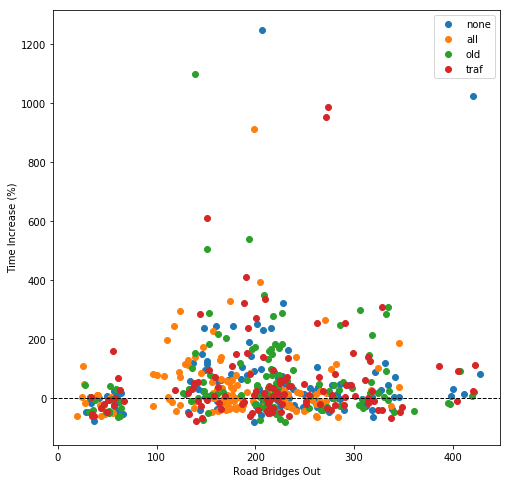

In [44]:
plt.figure(figsize=(8,8))
for strat in retstrats:
    plt.scatter(bout[strat], tt[strat], label=strat)
plt.xlabel('Road Bridges Out')
plt.ylabel('Time Increase (%)')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

# Histograms

In [ ]:
count = 1
plt.figure(figsize=(13,17))
for strat in strategies:
    plt.subplot(len(strategies), 2, count)
    plt.hist(total_time[strat], range=(-100, 400), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Travel Time Increase (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(total_time[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count+1)
    plt.hist(vmt[strat], range=(-10, 60), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('VMT Increase (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(vmt[strat]), color='k', linestyle='dashed', linewidth=1)
    
    count += 2
    
plt.subplots_adjust(hspace=.5, wspace=0.3)
plt.show()

# Boxplot

In [ ]:
plt.figure(figsize=(12, 8))
full_data = [total_time[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('Travel Time Increase (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('VMT Increase (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()